## Pre-Processing

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
books_data = pd.read_csv('./data/books_cleaned_data.csv')
fantasy_data = pd.read_csv('./data/fantasy_cleaned_data.csv')
total_data = pd.read_csv('./data/total_cleaned_data.csv')

In [3]:
books_data

,subreddit,selftext,title
0,books,"Let us imagine a world where musicians, alive ...",What song would you want to be turned into a b...
1,books,I have just finished reading Sam Kean's The Di...,The Disappearing Spoon: a delightful surprise ...
2,books,I know this book probably gets discussed fairl...,"Just finished ""For Whom the Bell Tolls"""
3,books,One of my Covid-19 projects is to discard item...,"A personal library, re-discovering my filing s..."
4,books,"I've just finished it, and I wholly believe it...",A People's History of the United States
...,...,...,...
2395,books,I've read the book and I want to share my thou...,Winston Smith is not the good guy in 1984
2396,books,I really have to thank the people on /r/books ...,In praise of The Master and Margarita
2397,books,First off: I don't read as much as I like. But...,I Just Finished East of Eden by John Steinbeck
2398,books,I bought the kindle version of the Complete Se...,Wheel of Time. Is everyone such a jerk all the...


In [4]:
fantasy_data

,subreddit,selftext,title
0,Fantasy,\n\nhttps://preview.redd.it/ophxrj07w5481.jpg...,Review: Cyber Mage by Saad Z. Hossain
1,Fantasy,Welcome to the 4th part of our [Curse of the ...,Curse of the Mistwraith Read-along Chapters 13...
2,Fantasy,Do you like fantasy? Do you like mysteries? Do...,[Book Review/Summary] The Obsidian &amp; Blood...
3,Fantasy,&amp;#x200B;\n\n[Cover Art by Deranged Doctor ...,"Bookclub: Q&amp;A with J.A. Andrews, the autho..."
4,Fantasy,Time to Vote in the [**September 2021 Book of ...,Vote for the September Goodreads Book of the M...
...,...,...,...
2395,Fantasy,I've noticed whenever someone asks for what th...,Are soft magic systems given an unfairly bad rep?
2396,Fantasy,**What is the HEA Bookclub?** [You can read ou...,HEA Book Club: Vote for our November book! (Oc...
2397,Fantasy,&gt; *It was bad luck to name a daughter after...,Para's Proper Reviews: Wicked Like a Wildfire ...
2398,Fantasy,I AM HALFWAY DONE AS OF THIS POST! \[blows par...,Climbing Mount Readmore: Reading Our Top Fanta...


In [5]:
# map fantasy and books subreddits to 1 and 0 respectively
total_data['subreddit'] = total_data['subreddit'].map({'Fantasy': 1, 'books': 0})

In [6]:
total_data

,subreddit,selftext,title
0,0,"Let us imagine a world where musicians, alive ...",What song would you want to be turned into a b...
1,0,I have just finished reading Sam Kean's The Di...,The Disappearing Spoon: a delightful surprise ...
2,0,I know this book probably gets discussed fairl...,"Just finished ""For Whom the Bell Tolls"""
3,0,One of my Covid-19 projects is to discard item...,"A personal library, re-discovering my filing s..."
4,0,"I've just finished it, and I wholly believe it...",A People's History of the United States
...,...,...,...
4795,1,I've noticed whenever someone asks for what th...,Are soft magic systems given an unfairly bad rep?
4796,1,**What is the HEA Bookclub?** [You can read ou...,HEA Book Club: Vote for our November book! (Oc...
4797,1,&gt; *It was bad luck to name a daughter after...,Para's Proper Reviews: Wicked Like a Wildfire ...
4798,1,I AM HALFWAY DONE AS OF THIS POST! \[blows par...,Climbing Mount Readmore: Reading Our Top Fanta...


In [7]:
# combine title and selftextvalues into one column
books_data['total_text'] = books_data['title'] + ' ' + books_data['selftext']
fantasy_data['total_text'] = fantasy_data['title'] + ' ' + fantasy_data['selftext']
total_data['total_text'] = total_data['title'] + ' ' + total_data['selftext']
books_data

,subreddit,selftext,title,total_text
0,books,"Let us imagine a world where musicians, alive ...",What song would you want to be turned into a b...,What song would you want to be turned into a b...
1,books,I have just finished reading Sam Kean's The Di...,The Disappearing Spoon: a delightful surprise ...,The Disappearing Spoon: a delightful surprise ...
2,books,I know this book probably gets discussed fairl...,"Just finished ""For Whom the Bell Tolls""","Just finished ""For Whom the Bell Tolls"" I know..."
3,books,One of my Covid-19 projects is to discard item...,"A personal library, re-discovering my filing s...","A personal library, re-discovering my filing s..."
4,books,"I've just finished it, and I wholly believe it...",A People's History of the United States,A People's History of the United States I've j...
...,...,...,...,...
2395,books,I've read the book and I want to share my thou...,Winston Smith is not the good guy in 1984,Winston Smith is not the good guy in 1984 I've...
2396,books,I really have to thank the people on /r/books ...,In praise of The Master and Margarita,In praise of The Master and Margarita I really...
2397,books,First off: I don't read as much as I like. But...,I Just Finished East of Eden by John Steinbeck,I Just Finished East of Eden by John Steinbeck...
2398,books,I bought the kindle version of the Complete Se...,Wheel of Time. Is everyone such a jerk all the...,Wheel of Time. Is everyone such a jerk all the...


---
### CountVectorizer on Books Data

In [8]:
# countvectorize books data
X = books_data['title']
y = books_data['subreddit']

In [9]:
cvec = CountVectorizer(stop_words = 'english', ngram_range = (1,1))
cvec.fit(X)
X = cvec.transform(X)

In [10]:
books_df = pd.DataFrame(X.todense(), # 'densified' the transformed data
                        columns = cvec.get_feature_names())
                        # get_feature_names on fitted cvec gets words learned from dataset based on 'columns'

books_df

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,120,1884,1984,2020,23,250th,50,90s,absolute,according,...,world,wounded,wow,write,writing,wuthering,ya,year,years,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
books_df.sum().T.sort_values(ascending = False).head(20)

book        480
read        384
finished    336
books       312
just        264
love        144
think       144
true        120
novel       120
reading     120
author      120
time        120
fiction      96
1984         96
history      72
don          72
way          72
stories      72
thoughts     72
life         72
dtype: int64

---
### CountVectorizer on Fantasy Data

In [12]:
# countvectorize books data
X = fantasy_data['title']
y = fantasy_data['subreddit']

In [13]:
cvec = CountVectorizer(stop_words = 'english', ngram_range = (1,1))
cvec.fit(X)
X = cvec.transform(X)

In [14]:
fantasy_df = pd.DataFrame(X.todense(), # 'densified' the transformed data
                          columns = cvec.get_feature_names())
                          # get_feature_names on fitted cvec gets words learned from dataset based on 'columns'

fantasy_df

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,11,13,14,15,18,1930s,20,2019,2020,27,...,wind,witch,woc,women,world,writer,writes,writing,years,yōko
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
fantasy_df.sum().T.sort_values(ascending = False).head(20)

review       600
book         456
fantasy      408
reviews      288
reading      216
read         192
bingo        168
books        144
just         120
author       120
mount         96
readmore      96
time          96
sanderson     96
like          96
brandon       96
novels        96
charlotte     96
club          96
amp           96
dtype: int64

---
### CountVectorizer on Combined Books & Fantasy Data

In [16]:
# countvectorize total data
X = total_data['title']
y = total_data['subreddit']

In [17]:
cvec = CountVectorizer(stop_words = 'english', ngram_range = (1,2))
cvec.fit(X)
X = cvec.transform(X)

In [18]:
total_df = pd.DataFrame(X.todense(), # 'densified' the transformed data
                        columns = cvec.get_feature_names())
                        # get_feature_names on fitted cvec gets words learned from dataset based on 'columns'

total_df

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,11,120,120 years,13,13 14,14,15,15 11,15 70s,18,...,year,year ago,year old,years,years ago,years publication,young,young target,yōko,yōko ogawa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4798,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
total_df.sum().T.sort_values(ascending = False).head(20)

book             936
review           600
read             576
books            456
finished         432
fantasy          408
just             384
reading          336
just finished    336
reviews          288
author           240
time             216
love             192
true             168
bingo            168
think            168
novels           144
novel            144
horror           120
like              96
dtype: int64

---
## GridSearch with CountVectorizer & Multinomial Naive Bayes

In [20]:
#X = data.drop(columns = 'subreddit')
X = total_data['total_text']
y = total_data['subreddit']

In [21]:
y.value_counts(normalize = True)

0    0.5
1    0.5
Name: subreddit, dtype: float64

In [22]:
# Redefine training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [23]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [24]:
# Hyperparameters:
# Maximum number of features fit: 2000, 3000
# Checks (individual tokens) and also checks (individual tokens and bigrams).

pipe_params = {
    #'cvec__max_features': [2_000, 3_000], # max num of features
    #'cvec__min_df': [2, 3], # min num of documents needed in percentage
    #'cvec__max_df': [.9, .95], # max num of documents needed in percentage
    'cvec__ngram_range': [(1, 1), (1, 2), (2,2)],
    'nb__alpha': [0.01, 0.1, 0.5, 1]
}

In [25]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params, 
                  cv = 5) 

In [26]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'nb__alpha': [0.01, 0.1, 0.5, 1]})

In [27]:
gs.best_score_

1.0

In [28]:
gs.best_params_

{'cvec__ngram_range': (1, 1), 'nb__alpha': 0.01}

In [29]:
print(f'Train Score: {gs.score(X_train, y_train)}')
print(f'Test Score: {gs.score(X_train, y_train)}')

Train Score: 1.0
Test Score: 1.0


In [30]:
preds = gs.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


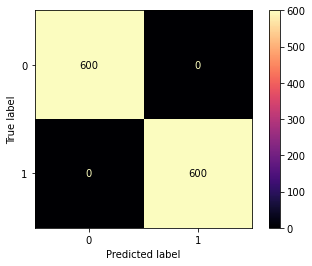

In [31]:
# confusion matrix
plot_confusion_matrix(gs, X_test, y_test, cmap='magma', values_format='d');

In [32]:
gs.predict(['Lord of the Rings Hobbit'])

array([1], dtype=int64)

In [33]:
gs.predict_proba(['Lord of the Rings Hobbit'])

array([[0.46055459, 0.53944541]])

In [34]:
(gs.predict_proba(['Lord of the Rings Hobbit'])[:,1]>=0.4).astype(int) # manually adjust threshold

array([1])

In [35]:
gs.predict_proba(['future book canonical'])

array([[9.99531730e-01, 4.68269808e-04]])

In [36]:
(gs.predict_proba(X_test)[:,1]>=0.6).astype(int)

array([1, 0, 0, ..., 1, 0, 1])

In [37]:
#pred_proba = (gs.predict_proba(X_test)[:,1]>=0.6).astype(int)
pred_proba = gs.predict_proba(X_test)

In [38]:
pred_proba[:,1]

array([1.00000000e+000, 1.66701312e-176, 4.04592804e-099, ...,
       1.00000000e+000, 1.70373522e-109, 1.00000000e+000])

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


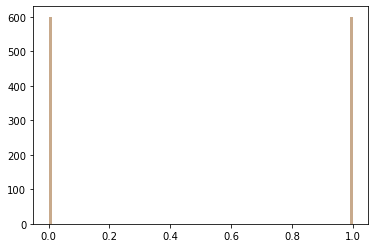

In [39]:
sns.distplot((gs.predict_proba(X_test)[:,1]>=0.9), kde = False, bins =100)
sns.distplot((gs.predict_proba(X_test)[:,0]<=0.1), kde = False, bins =100);

In [40]:
pred_proba_df=pd.DataFrame(pred_proba)
pred_proba_df

,0,1
0,0.000000e+00,1.000000e+00
1,1.000000e+00,1.667013e-176
2,1.000000e+00,4.045928e-99
3,1.000000e+00,7.973929e-86
4,1.000000e+00,5.067712e-65
...,...,...
1195,1.245316e-271,1.000000e+00
1196,1.000000e+00,4.800570e-59
1197,0.000000e+00,1.000000e+00
1198,1.000000e+00,1.703735e-109


<AxesSubplot:>

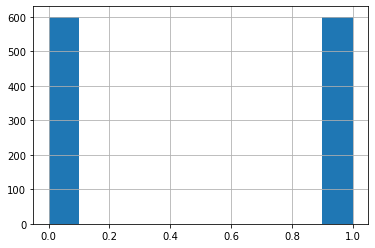

In [41]:
pred_proba_df[0].hist()

---
## GridSearch with TFIDVectorizer & Multinomial Naive Bayes

In [42]:
X = total_data['total_text']
y = total_data['subreddit']

In [43]:
tvec = TfidfVectorizer(stop_words = 'english', ngram_range= (1,2))
tvec.fit(X)
#X = tvec.transform(X)

TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

In [45]:
#tvec_total_df = pd.DataFrame(X.todense(), # 'densified' the transformed data
#                             columns = tvec.get_feature_names())
                             # get_feature_names on fitted cvec gets words learned from dataset based on 'columns'

#tvec_total_df

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [47]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__min_df': [2, 3], # min num of documents needed in percentage
    'tvec__max_df': [.9, .95], # max num of documents needed in percentage
}

In [48]:
#pipe_tvec.get_params()

In [49]:
gs_tvec = GridSearchCV(pipe_tvec,
                       param_grid = pipe_tvec_params,
                       cv = 5)

In [50]:
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [60]:
print(f'Train Score: {gs_tvec.score(X_train, y_train)}')
print(f'Test Score: {gs_tvec.score(X_train, y_train)}')

Train Score: 0.99
Test Score: 0.99


In [61]:
# predictions
preds_tvec = gs_tvec.predict(X_test)

# confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


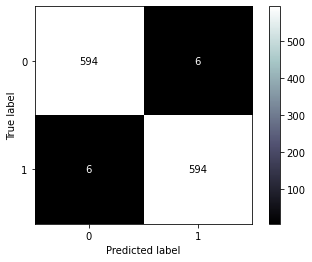

In [62]:
plot_confusion_matrix(gs_tvec, X_test, y_test, cmap = 'bone', values_format = 'd');

In [76]:
gs_tvec_feature_probs = gs_tvec.best_estimator_.named_steps['nb'].feature_log_prob_[0]

In [77]:
gs_tvec_feature_names = gs_tvec.best_estimator_.named_steps['tvec'].get_feature_names()
#zip with above, one may have big log prob that is forcing it to be keyed

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [78]:
zipped = zip(gs_tvec_feature_names, gs_tvec_feature_probs)

In [79]:
zipped_df = pd.DataFrame(zipped, columns = ['feature_name', 'feature_prob'])
zipped_df

,feature_name,feature_prob
0,000,-9.864034
1,04,-9.864034
2,07,-8.170034
3,10,-7.960072
4,100,-8.207524
...,...,...
2995,youtube,-8.324356
2996,yên,-9.864034
2997,zero,-9.671167
2998,zh,-9.470591


In [80]:
zipped_df.describe()

,feature_prob
count,3000.000000
mean,-8.573118
std,0.999499
min,-9.864034
25%,-9.424443
50%,-8.598045
75%,-7.906865
max,-4.975581


In [81]:
zipped_df.max()

feature_name          în
feature_prob   -4.975581
dtype: object

In [82]:
zipped_df.min()

feature_name         000
feature_prob   -9.864034
dtype: object

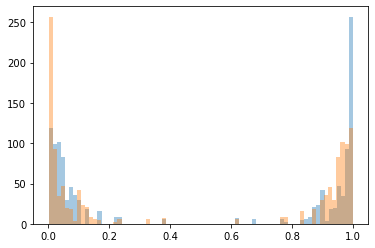

In [88]:
sns.distplot((gs_tvec.predict_proba(X_test)[:,1]), kde = False, bins = 75)
sns.distplot((gs_tvec.predict_proba(X_test)[:,0]), kde = False, bins = 75);
# mirrored results

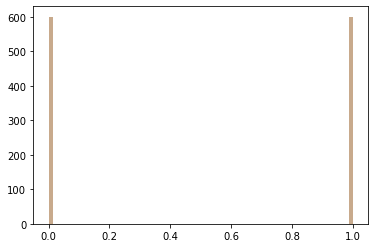

In [90]:
sns.distplot((gs_tvec.predict_proba(X_test)[:,1]>=0.6), kde = False, bins = 75)
sns.distplot((gs_tvec.predict_proba(X_test)[:,0]<0.6), kde = False, bins = 75);
# mirrored but absolute

---
## GridSearch with CountVectorizer & LogisticRegression

In [91]:
X = total_data['total_text']
y = total_data['subreddit']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [94]:
logreg_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

In [96]:
logreg_pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('logreg', LogisticRegression())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'logreg': LogisticRegression(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'logreg__C': 1.0,
 'logreg__class_weight': None,
 'logreg__dual': False,
 'logreg__fit_intercept': True,
 'logreg__intercept_scaling': 1,
 'logreg__l1_ratio': None,
 'logreg__max_iter': 100,
 'logreg__multi_class': 'auto',
 'logreg__n_jobs': None,
 'logreg__penalty': 'l2',
 'logreg__random_state': None,
 'logreg__solver': 'lbfgs',
 'logreg__tol':

In [97]:
pipe_params = {
    #'cvec__max_features': [2_000, 3_000], # max num of features
    #'cvec__min_df': [2, 3], # min num of documents needed in percentage
    #'cvec__max_df': [.9, .95], # max num of documents needed in percentage
    'cvec__ngram_range': [(1, 1), (1, 2), (2,2)],
    'logreg__C': [0.01, 0.1, 0.5, 1]
}

In [98]:
gs_logreg = GridSearchCV(pipe, 
                         param_grid = pipe_params, 
                         cv = 5) 

In [99]:
gs_logreg.fit(X_train, y_train)

C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sbhew\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'cvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'logreg__C': [0.01, 0.1, 0.5, 1]})

In [100]:
print(f'Train Score: {gs_logreg.score(X_train, y_train)}')
print(f'Test Score: {gs_logreg.score(X_train, y_train)}')

Train Score: 1.0
Test Score: 1.0
